# Qualitative Analysis: Ideas for Content and Thematic Analysis Using Python

## Background Information

### Overview of Content and Thematic Analysis

#### Summary
Content Analysis involves systematically categorizing and quantifying elements of the text to identify trends and frequencies, often with a more structured and objective approach.

Thematic Analysis focuses on identifying and interpreting themes and patterns within qualitative data to understand meanings and context.

Both methods provide valuable insights but serve different purposes: thematic analysis is more exploratory and interpretive, while content analysis is more systematic and quantifiable.

#### Content Analysis
* **Purpose**: To systematically analyze the content of qualitative data, often to quantify and categorize specific elements.

* **Approach**:
    * **Quantitative Focus**: Involves coding the text into categories or themes and often quantifies the frequency of these categories.
    * **Focus**: Concentrates on identifying and counting the occurrence of specific words, phrases, or themes within the text. It can be either qualitative or quantitative, but often involves quantifying textual elements to identify trends or patterns.
    * **Outcome**: Provides a structured overview of the content, highlighting how often specific elements appear and how they relate to each other.
    * **Process**:
        * Define categories or codes.
        * Systematically code the text according to predefined criteria.
        * Quantify the occurrence of categories.
        * Analyze patterns and trends in the data.

* **Application**: Useful for obtaining a systematic and objective overview of the content, identifying frequently occurring themes or elements, and analyzing trends across large volumes of text.

#### Thematic Analysis
* **Purpose**: To identify, analyze, and report patterns (themes) within qualitative data.

* **Approach**:

    * **Inductive or Deductive**: Themes can emerge from the data (inductive) or be predefined (deductive).
    * **Focus**: Concentrates on understanding the underlying meanings and patterns within the text. It involves coding the data into themes and sub-themes that capture significant patterns or ideas.
    * **Outcome**: Provides insights into how different themes relate to each other and to the overall research questions, often aiming to interpret and understand the context and meaning behind the data.
    * **Process**:
        * Familiarize with the data.
        * Generate initial codes.
        * Search for themes.
        * Review and refine themes.
        * Define and name themes.
        * Write up the analysis.

* **Application**: Useful for exploring complex patterns and meanings within data, and understanding how different themes contribute to the overall narrative.



### Tools Used in This Presentation

* [VS Code](https://code.visualstudio.com/)
    * [Jupyter Overview](https://jupyter.org)
        * [Jupyter in VS Code](https://code.visualstudio.com/docs/datascience/jupyter-notebooks)
        * [Markdown](https://www.markdownguide.org/basic-syntax)
    


* [Python](https://www.python.org/)
    * Packages
        * [Pandas](https://pandas.pydata.org/docs)
        * [NLTK](https://www.nltk.org) (Natural Language Tool Kit)

### Additional Resources

#### Python

* [Getting Started with Python in VS Code](https://code.visualstudio.com/docs/python/python-tutorial)
* [How to set up Python on Visual Studio Code](https://www.youtube.com/watch?v=9o4gDQvVkLU) (YouTube)
* [How to install Python Packages in VS Code](https://www.youtube.com/watch?v=InRmKECJK3s) (YouTube)
* [Python Package Index (PyPI)](https://pypi.org/) (additional packages for Python to extend it functionality)
* [Learning Python](https://www.reddit.com/r/learnpython/wiki/index/) (Reddit - large list)
* [Learning Python](https://www.youtube.com/watch?v=qwAFL1597eM) (YouTube)



#### Qualitative Research
* [The Practical Guide to Qualitative Content Analysis](https://delvetool.com/blog/guide-qualitative-content-analysis)
* [How to Analyze Qualitative Data from UX Research: Thematic Analysis](https://www.nngroup.com/articles/thematic-analysis)
* [How to do a content analysis](https://paperpile.com/g/content-analysis/#what-is-content-analysis)

# Why Python?

1. **Cost-Effective and Easily Available**: Python is open-source and free to use, avoiding the costs associated with purchasing licenses for proprietary software.

2. **Customizability**: Python allows for extensive customization and development of tailored solutions that precisely fit your analysis needs, whereas proprietary software may offer limited flexibility.

3. **Transparency and Control**: Python code is open and modifiable, allowing users to understand, modify, and improve the analysis methods used, unlike proprietary software where algorithms and methodologies are often hidden.

4. **Reproducibility**: Python scripts and notebooks enable easy sharing and replication of analyses, which is crucial for maintaining reproducibility in research.

5. **Integration Capabilities**: Python integrates well with other tools and technologies, including databases, APIs, and various data formats, facilitating a seamless workflow.

6. **Scalability**: Python solutions can be scaled and adapted to handle large volumes of data and complex analyses, providing more flexibility for growing or changing research needs.

7. **Extensive Libraries**: Python has a rich ecosystem of libraries (e.g., pandas, NumPy, scikit-learn, NLTK, spaCy) that support various aspects of qualitative analysis, including data manipulation, natural language processing, and machine learning.

8. **Learning and Skill Development**: Using Python can enhance your programming and data analysis skills, which are valuable and transferable across various domains and projects.

9. **Community Support**: A large and active community of developers and researchers provides continuous support, documentation, and updates, which can be invaluable for troubleshooting and learning.

10. **Low Barrier to Entry**: With the development of [Large Language Models](https://huggingface.co/spaces/mike-ravkine/can-ai-code-results) (like ChatGPT), getting started has never been easier. You can generate working code in seconds using natural language queries. 

# Presentation Overview

* **[Data Preprocessing](https://en.wikipedia.org/wiki/Data_preprocessing)**: Clean data and ensure its properly standardized.
* **[N-Grams](https://en.wikipedia.org/wiki/N-gram)**: Provides quantitative data on word patterns and frequencies.
* **[Parts-of-Speech](https://en.wikipedia.org/wiki/Part_of_speech) Analysis**: Analyzes grammatical elements and their frequency.
    * The results from these analyses can be used to identify broader themes and patterns within the comments.
* **[Sentiment Analysis](https://en.wikipedia.org/wiki/Sentiment_analysis)**: Quantifies emotional tones across comments.

* **Counting occurrences and creating [indicator/dummy variables](https://en.wikipedia.org/wiki/Dummy_variable_(statistics))**: This quantifies the presence of each theme in the comments.
* **Calculating a [correlation](https://en.wikipedia.org/wiki/Correlation) matrix**: This step analyzes the relationships between different themes to understand how they co-occur.

# Load Code

## Load Dependencies

In [1]:
import re
import os
import pandas as pd
import string
import chardet
import nltk
from nltk import ngrams, word_tokenize
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
from autocorrect import Speller
from collections import Counter
import subprocess # Used to launch Excel
import openpyxl #Used by Pandas to open Excel files
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download NLTK resources if not already downloaded. This only has to be done once.

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

## Load Functions

### Load to dataframe

In [3]:
import pandas as pd
import os


def detect_encoding(file_path):
    """
    Detect the encoding of a file.

    Args:
        file_path (str): The path to the file whose encoding needs to be detected.

    Returns:
        str: The detected encoding of the file.

    Raises:
        FileNotFoundError: If the file does not exist.
        IOError: If there is an issue reading the file.
    """
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"The file at {file_path} does not exist.")
    
    try:
        with open(file_path, 'rb') as f:
            result = chardet.detect(f.read(10000))  # Read a sample of the file
        return result['encoding']
    except IOError as e:
        raise IOError(f"An error occurred while reading the file: {e}")

def load_file_to_dataframe(file_path, sheet_name=None):
    """
    Load a file into a pandas DataFrame based on its file extension.

    Args:
        file_path (str): The path to the file to be loaded.
        sheet_name (str, optional): The name of the sheet to load from Excel files. Defaults to None.

    Returns:
        pd.DataFrame: A pandas DataFrame containing the data from the file.

    Raises:
        FileNotFoundError: If the file does not exist.
        ValueError: If the file type is unsupported or the DataFrame is empty.
        RuntimeError: If an error occurs while loading the file.
    """
    # Check if file exists
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"The file at {file_path} does not exist.")
    
    # Extract the file extension
    file_extension = file_path.split('.')[-1].lower()

    encoding = 'utf-8'  # Default encoding
    
    try:
        # Check the file extension and open the file accordingly
        if file_extension == 'csv':
            df = pd.read_csv(file_path, encoding=encoding)
        elif file_extension in ['xls', 'xlsx']:
            df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
        elif file_extension == 'json':
            df = pd.read_json(file_path, encoding=encoding)
        elif file_extension in ['txt', 'tsv']:
            delimiter = '\t' if file_extension == 'tsv' else ','
            df = pd.read_csv(file_path, delimiter=delimiter, encoding=encoding)
        elif file_extension == 'parquet':
            df = pd.read_parquet(file_path)
        elif file_extension == 'hdf':
            df = pd.read_hdf(file_path)
        elif file_extension == 'feather':
            df = pd.read_feather(file_path)
        else:
            raise ValueError("Unsupported file type. Supported types are: CSV, Excel (xls, xlsx), JSON, TXT, TSV, Parquet, HDF, Feather")
        
    except (UnicodeDecodeError, pd.errors.ParserError) as e:
        # Try detecting the file encoding if initial read fails
        detected_encoding = detect_encoding(file_path)
        try:
            if file_extension == 'csv':
                df = pd.read_csv(file_path, encoding=detected_encoding)
            elif file_extension == 'json':
                df = pd.read_json(file_path, encoding=detected_encoding)
            elif file_extension in ['txt', 'tsv']:
                delimiter = '\t' if file_extension == 'tsv' else ','
                df = pd.read_csv(file_path, delimiter=delimiter, encoding=detected_encoding)
        except Exception as e:
            raise RuntimeError(f"An error occurred while loading the file: {e}")
    
    # Basic data validation: Check if DataFrame is empty
    if df.empty:
        raise ValueError("The loaded DataFrame is empty.")

    return df

### Open in Excel

In [4]:
def open_csv_in_excel(file_path):
    """
    Opens a CSV file in Microsoft Excel.

    This function attempts to find the Microsoft Excel executable (`EXCEL.EXE`) on the system
    and uses it to open the specified CSV file. It first checks common installation paths for
    Excel and then searches additional directories if necessary.

    Args:
        file_path (str): The path to the CSV file that needs to be opened in Excel.

    Returns:
        None

    Raises:
        FileNotFoundError: If the file_path does not point to a valid file.
        RuntimeError: If Excel cannot be found on the system or if there is an issue opening the file.

    Notes:
        - This function assumes that Microsoft Excel is installed on the system.
        - The `find_excel_exe` function is used to search for Excel in common installation directories.
        - The function prints an error message if Excel cannot be found or if there is an issue opening the file.
    """

    excel_paths = [r"C:\Program Files (x86)\Microsoft Office\root\Office16\EXCEL.EXE", r"C:\Program Files\Microsoft Office\root\Office16\EXCEL.EXE"]
    
    excel_program_path = None

    for excel_path in excel_paths:

        # Check if EXCEL.EXE exists in check_excel_path_1
        if os.path.exists(excel_path):
            excel_program_path = excel_path

    # # Check if EXCEL.EXE exists in check_excel_path_2
    # if not excel_path and os.path.exists(check_excel_path_2):
    #     excel_path = check_excel_path_2

    if not excel_program_path:
        # Directories to search for EXCEL.EXE
        directories_to_search = [
            r"C:\Program Files",
            r"C:\Program Files (x86)",
            r"C:\\",
            # Add more directories to search if needed
        ]

        excel_program_path = find_excel_exe(directories_to_search)

    if excel_program_path:
        subprocess.Popen([excel_program_path, file_path])
    else:
        print("Sorry. Cannot open file directly. Excel cannot be found")

def find_excel_exe(directories):
    for directory in directories:
        for root, dirs, files in os.walk(directory):
            for file in files:
                if file.lower() == 'excel.exe':
                    return os.path.join(root, file)
    return None

def open_in_excel(filename):
    if os.path.exists(filename):
        print(f"Report written to: {filename}")
        open_csv = input(f"Open file in Excel? Y/N")
        if open_csv.lower() == "y":
            open_csv_in_excel(filename)
    else:
        print("Error writing report.")


### Misc Support Functions

In [5]:
# Load a 2-column csv file as a pandas dataframe and return a dictionary 

def load_csv_to_dict(file_path, key_column, value_column):
    """
    Load a CSV file and create a dictionary from specified key and value columns.

    Parameters:
    file_path (str): The path to the CSV file.
    key_column (str): The name of the column to use as keys in the dictionary.
    value_column (str): The name of the column to use as values in the dictionary.

    Returns:
    dict: A dictionary with keys from the key_column and values from the value_column.
    """
    df = pd.read_csv(file_path)
    
    # Convert NaN values to empty strings
    df[value_column] = df[value_column].apply(lambda x: '' if pd.isna(x) else str(x))
    
    return df.set_index(key_column)[value_column].to_dict()

def ensure_string(text, string_length_threshold):
    """
    Ensure the input is converted to a string representation.

    Parameters:
    text: The input to be checked and converted to a string if necessary.
    string_length_threshold: The minimum length of the string. If the length of the string is less than this threshold, return an empty string.

    Returns:
    str: The input converted to a string or an empty string if the length is less than the threshold or conversion fails.
    """
    if pd.isnull(text):
        return ""
    elif isinstance(text, str):
        text = text.strip()  # Strip whitespace from both ends
        if len(text) < string_length_threshold:
            return ""
        return text
    
    try:
        # Attempt to convert non-string types to string
        text = str(text).strip()
        if len(text) < string_length_threshold:
            return ""
        return text
    except (ValueError, TypeError):
        return ""
    
def clean_whitespace(text):
    # Remove leading and trailing whitespace
    cleaned_text = text.strip()
    
    # Replace multiple spaces with a single space
    cleaned_text = ' '.join(cleaned_text.split())
    
    return cleaned_text


def save_dataframe_with_incremented_filename(file_path):
    """
    Check if a filename already exists. If it does, it returns an incremented filename.

    Parameters:
    df (pd.DataFrame): The DataFrame to be saved.
    file_path (str): The initial file path for the CSV file.
    """
    base, extension = os.path.splitext(file_path)
    counter = 1

    # Check if the file already exists
    while os.path.exists(file_path):
        # Increment the file name
        file_path = f"{base}_{counter}{extension}"
        counter += 1

    return file_path

### Text Analysis Functions

#### Lists and Settings

In [6]:
# Stopword lisit
external_stopword_list = r"D:\Data Analysis\Qualitative Analysis\Cleaning Text\lists and dictionaries\stopwords_seo.csv"

# Contractions dictionary
external_contractions_dictionary = r"D:\Data Analysis\Qualitative Analysis\Cleaning Text\lists and dictionaries\contractions_list.csv"

# External search and replace file
custom_search_and_replace_dictionary = r"D:\Data Analysis\Qualitative Analysis\Cleaning Text\lists and dictionaries\custom search-and-replace dictionary.csv"

# Load Custom Dictionaries
external_stopword_list_dict = load_csv_to_dict(external_stopword_list, "stopword", "replace")
contractions_dict = load_csv_to_dict(external_contractions_dictionary, "expansion", "contraction")
custom_search_and_replace_dict = load_csv_to_dict(custom_search_and_replace_dictionary, "search_term", "replace_term")

In [7]:
# This is a dictionary of common encoding errors

common_encoding_errors = {
    "&lt;": "<",        # Less-than sign
    "&gt;": ">",        # Greater-than sign
    "&amp;": "&",       # Ampersand
    "&quot;": "\"",     # Double quotation mark
    "&apos;": "'",      # Apostrophe
    "&nbsp;": " ",      # Non-breaking space
    "&copy;": "(c)",    # Copyright sign
    "&reg;": "(r)",     # Registered sign
    "&euro;": "EUR",    # Euro sign
    "&pound;": "GBP",   # Pound sign
    "&yen;": "Yen",     # Yen sign
    "&cent;": "c",      # Cent sign
    "&sect;": "§",      # Section sign
    "&para;": "¶",      # Pilcrow sign
    "&deg;": "°",       # Degree sign
    "&plusmn;": "±",    # Plus-minus sign
    "&micro;": "µ",     # Micro sign
    "&sup2;": "^2",     # Superscript two
    "&sup3;": "^3",     # Superscript three
    "&frac14;": "1/4",  # Fraction one quarter
    "&frac12;": "1/2",  # Fraction one half
    "&frac34;": "3/4",  # Fraction three quarters
    "&times;": "x",     # Multiplication sign
    "&divide;": "/",    # Division sign
    "&bull;": "•",      # Bullet
    "&ndash;": "-",     # En dash
    "&mdash;": "-",     # Em dash
    "&lsquo;": "'",     # Left single quotation mark
    "&rsquo;": "'",     # Right single quotation mark
    "&sbquo;": ",",     # Single low-9 quotation mark
    "&ldquo;": "\"",    # Left double quotation mark
    "&rdquo;": "\"",    # Right double quotation mark
    "&bdquo;": "\"",    # Double low-9 quotation mark
    "&hellip;": "...",  # Horizontal ellipsis
    "%20": " ",         # Space
    "%21": "!",         # Exclamation mark
    "%22": "\"",        # Double quotation mark
    "%23": "#",         # Number sign
    "%24": "$",         # Dollar sign
    "%25": "%",         # Percent sign
    "%26": "&",         # Ampersand
    "%27": "'",         # Apostrophe
    "%28": "(",         # Left parenthesis
    "%29": ")",         # Right parenthesis
    "%2A": "*",         # Asterisk
    "%2B": "+",         # Plus sign
    "%2C": ",",         # Comma
    "%2D": "-",         # Hyphen
    "%2E": ".",         # Period
    "%2F": "/",         # Slash
    "%3A": ":",         # Colon
    "%3B": ";",         # Semicolon
    "%3C": "<",         # Less-than sign
    "%3D": "=",         # Equal sign
    "%3E": ">",         # Greater-than sign
    "%3F": "?",         # Question mark
    "%40": "@",         # At sign
    "%5B": "[",         # Left square bracket
    "%5C": "\\",        # Backslash
    "%5D": "]",         # Right square bracket
    "%5E": "^",         # Caret
    "%5F": "_",         # Underscore
    "%60": "`",         # Grave accent
    "%7B": "{",         # Left curly bracket
    "%7C": "|",         # Vertical bar
    "%7D": "}",         # Right curly bracket
    "%7E": "~",         # Tilde
    "â€”": "-",         # Em dash
    "â€“": "–",         # En dash
    "â€˜": "'",         # Left single quotation mark
    "â€™": "'",         # Right single quotation mark
    "â€œ": "\"",        # Left double quotation mark
    "â€": "\"",         # Right double quotation mark
    "â€¦": "...",       # Ellipsis
    "â€": "\"",         # Right double quotation mark (alternate)
    "â€™": "'",         # Right single quotation mark (alternate)
}

#### Text Cleaning Functions

In [8]:
# Main Text cleaning function
def clean_text(text):
    """
    Clean and preprocess the input text based on specified cleaning options.

    This function applies a series of text cleaning operations to the input `text` based on the 
    global `text_cleaning_options` dictionary. The cleaning operations include:
    - Converting text to lowercase
    - Expanding or contracting contractions
    - Replacing common encoding errors
    - Standardizing highway and DriveBC references
    - Using a custom search-and-replace dictionary
    - Removing stopwords
    - Stripping or replacing punctuation
    - Performing spell check
    - Stemming or lemmatizing words
    - Cleaning up extra whitespace

    Args:
        text (str): The text to be cleaned and preprocessed.

    Returns:
        str: The cleaned text after applying the specified text cleaning operations.

    Raises:
        Exception: If any error occurs during text processing, an error message is printed, 
                   and an empty string is returned.

    Notes:
        - The function uses global dictionaries for contractions, common encoding errors, 
          custom search-and-replace terms, and stopwords.
        - The `text_cleaning_options` dictionary determines which cleaning operations are applied.
        - The `ensure_string` function is assumed to ensure that `text` is a string. It is not defined here.
        - The `clean_whitespace` function is assumed to handle extra whitespace. It is not defined here.
    """


    global text_cleaning_options

    # Set Cleaning Options
    transform_contractions = text_cleaning_options["Transform contractions"]        
    convert_to_lowercase = text_cleaning_options["Convert to lowercase"]
    covert_common_encoding_errors = text_cleaning_options["Convert Common Encoding Errors"]
    
    strip_punctuation = text_cleaning_options["Strip punctuation"]
    remove_stopwords = text_cleaning_options["Remove stopwords"]

    use_custom_sar_dict = text_cleaning_options["Use custom Search-and-Replace dictionary"]
    standardize_highway_references = text_cleaning_options["Standardize highway references"]
    standardize_drivebc_references  = text_cleaning_options["Standardize drivebc references"]
    spell_check = text_cleaning_options["Spell check"]
    stem_words  = text_cleaning_options["Stem words"]
    lemmatize_words = text_cleaning_options["Lemmatize words"]

    try:
        # Make sure the data is actually text
        text = ensure_string(text,3)

        # Convert all text to lower case
        if convert_to_lowercase is True:
            text = text.lower()

        # Replace contractions
        if transform_contractions == "Expand":
            # Expand contractions
            for key, value in contractions_dict.items():
                text = text.replace(value, key)
            # Contract expansions
        elif transform_contractions == "Contract":
                for key, value in contractions_dict.items():
                    text = text.replace(key, value)

        if covert_common_encoding_errors is True:
            # Perform character replacement using the dictionary
            for improper, proper in common_encoding_errors.items():
                text = text.replace(improper, proper)
       
        # Standardize Highway References
        if standardize_highway_references is True:
            regex_highway_search1 = re.compile(
                r"#*\b(bc *)*h[ighway]*[\s#]*(\d+[abcd]*)\b",
                re.IGNORECASE,
            )
            regex_highway_replace1 = r"BCHwy\2"
            text = re.sub(regex_highway_search1, regex_highway_replace1, text)

            regex_highway_search2 = re.compile(
                r"\b(bc *)*h[ighway]*[\s#]*\b",
                re.IGNORECASE,
            )
            regex_highway_replace2 = r"highway"
            text = re.sub(regex_highway_search2, regex_highway_replace2, text)

        # Standardize DriveBC references
        if standardize_drivebc_references is True:
            regex_drivebc_search = re.compile(
                r"\bdrive.*bc\b",
                re.IGNORECASE,
            )
            regex_drivebc_replace = r"drivebc"
            text = re.sub(regex_drivebc_search, regex_drivebc_replace, text)

        # Use a custom search and replace dictionary
        if use_custom_sar_dict is True:
            for key, value in custom_search_and_replace_dict.items():
                text = text.replace(key, value)

        # Remove stop words
        if remove_stopwords is True:
            for key, value in external_stopword_list_dict.items():
                text = text.replace(key, value)

        # strip punctuation
        if strip_punctuation is True:
            # # This removed punctuation marks
            # text = " ".join([char for char in text if char not in string.punctuation])
            
            # This replaces punctuation marks with a space
            translation_table = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
            # Replace punctuation with spaces
            text = text.translate(translation_table)


        if spell_check is True:
            text = text.split()
            text = [spell(word) for word in text]
            text = " ".join(text)

        # Stem words
        if stem_words is True:
            text = text.split()
            text = [ps.stem(word) for word in text]
            text = " ".join(text)

        # Lemmatize words
        if lemmatize_words is True:
            text = text.split()
            text = [wn.lemmatize(word) for word in text]
            text = " ".join(text)

        # Clean Whitespace
        text = clean_whitespace(text)

        return text
    except Exception as e:
        print(f"Error processing text: {e}")
        return ""


# Add clean text to dataframe
def add_clean_text_column(df,comments):
    """
    Adds a cleaned text column to a DataFrame by applying text cleaning operations.

    This function adds a new column to the input DataFrame, `df`, which contains cleaned text
    derived from the `comments` Series. The cleaning is performed using the `clean_text` function.

    Args:
        df (pd.DataFrame): The DataFrame to which the cleaned text column will be added.
        comments (pd.Series): A Series containing the text data to be cleaned and added to the DataFrame.

    Returns:
        pd.DataFrame: The original DataFrame with an additional column named 'clean_text' that contains the cleaned text.

    Raises:
        ValueError: If `comments` is not a Series or if its length does not match the number of rows in `df`.
        Exception: If any error occurs during the application of the `clean_text` function.

    Notes:
        - The `comments` Series should have the same length as the number of rows in the DataFrame `df`.
        - The `clean_text` function is expected to be defined elsewhere and handle the text cleaning process.
    """
    if not isinstance(comments, pd.Series):
        raise ValueError("The 'comments' argument must be a pandas Series.")
    if len(comments) != len(df):
        raise ValueError("The length of 'comments' must match the number of rows in the DataFrame.")

    try:
        df["clean_text"] = comments.apply(lambda x: clean_text(x))
        return df
    except Exception as e:
        print(f"Error adding clean text column: {e}")
        raise

### N-Gram Counter

In [9]:
def ngram_counter(series):
    """
    Counts and returns the most common n-grams in a pandas Series of text data.

    The function prompts the user to input the starting and ending n-gram lengths, 
    as well as the number of top n-grams to find for each length. It then processes 
    the text data, tokenizes it, generates n-grams for the specified lengths, and 
    counts their occurrences. Finally, it returns a DataFrame with the n-grams, 
    their types, and counts.

    Parameters:
    series (pandas.Series): A pandas Series containing text data.

    Returns:
    pandas.DataFrame: A DataFrame with columns 'N-Gram', 'N-Gram Type', and 'Count',
                      containing the most common n-grams and their counts for each
                      specified n-gram length.

    User Inputs:
    - Starting n-gram length: An integer specifying the smallest n-gram length (e.g., 
                              1 for monogram, 2 for bigram, etc.).
    - Ending n-gram length: An integer specifying the largest n-gram length.
    - Number of n-grams: An integer specifying the number of top n-grams to find 
                         for each n-gram length.

    Example:
    >>> import pandas as pd
    >>> series = pd.Series(["This is a sample text.", "This text is for testing purposes."])
    >>> result = ngram_counter(series)
    >>> print(result)
               N-Gram N-Gram Type  Count
    0            this       1-gram      2
    1              is       1-gram      2
    2              a       1-gram      1
    3          sample       1-gram      1
    4            text       1-gram      2
    5           this is     2-gram      2
    6              is a     2-gram      1
    7          sample text  2-gram      1
    8            text is    2-gram      1
    9              is for   2-gram      1
    10           for testing 2-gram     1
    11 testing purposes 2-gram  1
    """
    # Prompt user for the starting and ending n-gram lengths
    os.system("cls")
    while True:
        try:
            start_length = int(input("Enter the starting n-gram length (1 for monogram, 2 for bigram, etc.): "))
            break
        except ValueError:
            print("Invalid input. Please enter a valid integer.")
    
    while True:
        try:
            end_length = int(input("Enter the ending n-gram length: "))
            break
        except ValueError:
            print("Invalid input. Please enter a valid integer.")

    # Prompt user for the number of n-grams to find
    while True:
        try:
            num_ngrams = int(input("Enter the number of n-grams to find for each type: "))
            break
        except ValueError:
            print("Invalid input. Please enter a valid integer.")

    ngrams_list = []

    # Process each n-gram length
    for n in range(start_length, end_length + 1):
        ngram_counts = Counter()
        
        # Process each text in the series
        for text in series.dropna().str.lower():
            tokens = word_tokenize(text)
            if len(tokens) >= n:
                # Generate and count n-grams directly
                generated_ngrams = ngrams(tokens, n)
                ngram_counts.update(generated_ngrams)

        # Get the top n-grams of each type
        top_ngrams = ngram_counts.most_common(num_ngrams)
        for ngram, count in top_ngrams:
            ngrams_list.append([' '.join(ngram), f"{n}-gram", count])

    # Create a DataFrame with the n-grams, their types, and counts
    result_df = pd.DataFrame(ngrams_list, columns=['N-Gram', 'N-Gram Type', 'Count'])

    return result_df

### Isolate Parts of Speech Functions

In [10]:
def isolate_pos(series, selected_parts_of_speech, string_length_threshold):
    """
    Isolates and counts words from a text series based on selected parts of speech and a string length threshold.

    This function processes the input `series` by tokenizing it, tagging the tokens with their parts of speech,
    and filtering the words based on the selected parts of speech. It then removes stop words, applies a string 
    length threshold, and returns a DataFrame with word counts for the remaining words.

    Args:
        series (pd.Series or str): The input text data, either as a pandas Series or a single string. 
        selected_parts_of_speech (list of str): A list of parts of speech to filter the tokens. 
        string_length_threshold (int): The minimum length of words to include in the final word count.

    Returns:
        pd.DataFrame: A DataFrame containing two columns:
            - 'word': The words filtered by the selected parts of speech and length threshold.
            - 'count': The frequency of each word.

    Raises:
        ValueError: If `selected_parts_of_speech` is empty or `string_length_threshold` is not a positive integer.
        TypeError: If `series` is neither a pandas Series nor a string.

    Notes:
        - The `series` is converted to a string if it is a pandas Series.
        - NLTK's `word_tokenize` and `pos_tag` functions are used for tokenization and part-of-speech tagging.
        - The function uses a predefined list of stop words to filter out common, non-informative words.
        - Words are filtered based on the specified length threshold before counting their occurrences.

    Example:
        >>> df = pd.Series(["The quick brown fox jumps over the lazy dog."])
        >>> pos_list = ['NN', 'JJ']  # Example parts of speech: Noun and Adjective
        >>> threshold = 3
        >>> isolate_pos(df, pos_list, threshold)
           word  count
        0   quick      1
        1   brown      1
        2   jumps      1
        3   over       1
    """


    if not selected_parts_of_speech:
        print("No Parts of Speech have been selected. Please select them and try again.")
        input(f"Press 'Enter' to continue.")
        return

    if isinstance(series, pd.Series):
        series = series.to_string()

    # Tokenize the sentence into individual words
    tokens = nltk.word_tokenize(series)

    # Use NLTK's POS tagger to tag each word with its part of speech
    pos_tags = nltk.pos_tag(tokens)

    # Create a list of words filtered by chosen Part-of-Speech (PoS) type
    word_list = []
    print("Tagging parts of speech...")
    for word, pos in pos_tags:
        if pos in selected_parts_of_speech:
            word_list.append(word)

    # Remove any stop words from the list
    stop_words = [
        "..", "'m", "'s", "#name?", "are", "be", "been", "being", "did", "do", "does", "done",
        "get", "go", "had", "has", "have", "i", "ì", "is", "make", "n/a", "needs", "put", "Q",
        "seems", "take", "use", "vs", "was", "way", "were"
    ]
    
    cleaned_word_list = [element for element in word_list if element not in stop_words]

    # Apply string length threshold
    filtered_word_list = [word for word in cleaned_word_list if len(word) >= string_length_threshold]

    # Count the frequency of each word
    word_counts = pd.Series(filtered_word_list).value_counts().reset_index()

    # Rename the columns of the DataFrame
    word_counts.columns = ["word", "count"]

    # Sort the DataFrame by count in descending order
    word_counts = word_counts.sort_values(by="count", ascending=False).reset_index(drop=True)

    return word_counts

### Sentiment Analysis

In [11]:
def add_sentiment_column(df, text_column):
    """
    Add a sentiment score column to the DataFrame based on the specified text column using VADER.

    Parameters:
    df (pd.DataFrame): The original DataFrame.
    text_column (str): The name of the column containing the text for sentiment analysis.

    Returns:
    pd.DataFrame: The DataFrame with an added "sentiment" score column.
    """
    # Ensure the text_column exists in the DataFrame
    if text_column not in df.columns:
        raise ValueError(f"Column '{text_column}' not found in DataFrame columns.")

    # Initialize the VADER sentiment intensity analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Define a function to calculate the sentiment score
    def get_sentiment(text):
        if pd.isnull(text) or not isinstance(text, str) or text.strip() == "":
            return None  # Return None for rows without valid text
        sentiment = analyzer.polarity_scores(text)
        return sentiment['compound']  # Compound sentiment score

    # Apply the sentiment function to the text column and add the results to a new column
    df['sentiment'] = df[text_column].apply(get_sentiment)

    return df

### Thematic Analysis

In [12]:
def process_themes_and_comments(theme_list_path, comments_df, comments_column):
    """
    Processes comments in a DataFrame by mapping terms to associated themes and adding new columns for each theme.

    This function reads a CSV file containing a list of terms and their associated themes, then processes the 
    comments in the specified column of a DataFrame to indicate which themes are present based on the terms. 
    It adds new columns to the DataFrame for each unique theme, setting the value to 1 if the theme is present 
    in the comment and 0 otherwise.

    Args:
        theme_list_path (str): Path to the CSV file containing terms and their associated themes. The file should 
                               have two columns: 'term' and 'theme', where 'term' contains comma-separated terms 
                               and 'theme' contains comma-separated themes associated with those terms.
        comments_df (pd.DataFrame): DataFrame containing comments. It must have at least one column, specified 
                                    by `comments_column`, which contains the text comments to be processed.
        comments_column (str): The name of the column in `comments_df` that contains the comments to be processed.

    Returns:
        pd.DataFrame: The input DataFrame `comments_df` with additional columns for each unique theme found in 
                      the `theme_list_path`. Each theme column will contain 1 if the theme is present in the 
                      corresponding comment, and 0 otherwise.

    Raises:
        FileNotFoundError: If the CSV file specified by `theme_list_path` cannot be found.
        KeyError: If the specified `comments_column` does not exist in `comments_df`.
        ValueError: If the CSV file does not contain the required columns 'term' and 'theme'.

    Notes:
        - The function assumes that the 'term' and 'theme' columns in the CSV file are comma-separated.
        - Themes are added as new columns to the original DataFrame, initialized with 0. The presence of each 
          theme in the comments is indicated with a 1.
        - Comments are processed in a case-insensitive manner.
        - The function does not handle multi-word terms or themes; it looks for exact matches of terms in comments.

    Example:
        >>> theme_list_path = 'themes.csv'
        >>> comments_df = pd.DataFrame({'comment': ['The quick brown fox', 'Jumps over the lazy dog']})
        >>> comments_column = 'comment'
        >>> process_themes_and_comments(theme_list_path, comments_df, comments_column)
           comment  theme1  theme2
        0  The quick brown fox       1       0
        1  Jumps over the lazy dog   0       1
    """
    # Load the theme list CSV file into a DataFrame
    theme_list_df = pd.read_csv(theme_list_path)

    # Create a dictionary to map terms to their associated themes
    term_to_themes = {}
    for _, row in theme_list_df.iterrows():
        terms = row['term'].split(',')
        themes = row['theme'].split(',')
        for term in terms:
            term = term.strip()
            if term not in term_to_themes:
                term_to_themes[term] = set()
            for theme in themes:
                term_to_themes[term].add(theme.strip())

    # Create new columns in comments_df for each unique theme
    unique_themes = set()
    for themes in term_to_themes.values():
        unique_themes.update(themes)

    for theme in unique_themes:
        comments_df[theme] = 0  # Initialize all theme columns with 0

    # Define a function to process each comment
    def process_comment(comment):
        if pd.isnull(comment):
            return {theme: 0 for theme in unique_themes}
        comment = comment.lower()
        words = set(comment.split())  # Split the comment into words
        result = {theme: 0 for theme in unique_themes}
        for term, themes in term_to_themes.items():
            term = term.lower()
            if term in words:  # Check for exact match
                for theme in themes:
                    result[theme] = 1
        return result

    # Check if comments_column exists
    if comments_column not in comments_df.columns:
        raise KeyError(f"Column '{comments_column}' not found in comments_df")

    # Apply the function to each row in the comments column
    results = comments_df[comments_column].apply(process_comment)

    # Update the comments_df with the results
    for theme in unique_themes:
        comments_df[theme] = results.apply(lambda x: x.get(theme, 0))

    return comments_df

### Correlation Analysis

In [13]:
def analyze_correlation(df, threshold):
    """
    Analyzes the correlation between numeric columns in a DataFrame and visualizes the results.

    This function computes the correlation matrix for numeric columns in the provided DataFrame, applies a threshold 
    to filter the correlations, and generates a heatmap to visualize the filtered correlations. It also returns a list 
    of column pairs with their correlation scores that meet or exceed the specified threshold.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data. It must include at least two numeric columns for 
                           correlation analysis.
        threshold (float): The correlation threshold used to filter the matrix. Only correlations with an absolute value 
                           greater than or equal to this threshold will be included in the results.

    Returns:
        list of tuples: A list of tuples, each containing:
            - A tuple of two column names (`col1`, `col2`).
            - The correlation score between these two columns.
          The list is sorted by the absolute value of the correlation score in descending order.

    Raises:
        ValueError: If there are fewer than two numeric columns in the DataFrame.

    Notes:
        - The function uses Seaborn and Matplotlib to create a heatmap of the filtered correlation matrix.
        - Correlations below the specified threshold are replaced with NaN in the heatmap.
        - The correlation matrix is computed using Pearson correlation by default.
        - Ensure that the DataFrame contains numeric data in the columns to be analyzed.

    Example:
        >>> import pandas as pd
        >>> import numpy as np
        >>> import seaborn as sns
        >>> import matplotlib.pyplot as plt
        >>> df = pd.DataFrame({
        >>>     'A': np.random.rand(100),
        >>>     'B': np.random.rand(100),
        >>>     'C': np.random.rand(100),
        >>>     'D': np.random.rand(100)
        >>> })
        >>> threshold = 0.5
        >>> analyze_correlation(df, threshold)
        [(('A', 'B'), 0.6), (('C', 'D'), 0.55)]  # Example output, actual result may vary
    """

    # Identify numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    if len(numeric_cols) < 2:
        raise ValueError("Not enough numeric columns to compute correlations.")
    
    # Compute the correlation matrix
    corr_matrix = df[numeric_cols].corr()
    
    # Apply the threshold to the correlation matrix
    filtered_corr_matrix = corr_matrix.applymap(lambda x: x if abs(x) >= threshold else np.nan)
    
    # Create a heatmap of the filtered correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=filtered_corr_matrix.isnull())
    plt.title('Correlation Matrix Heatmap (Filtered by Threshold)')
    plt.show()
    
    # Create a list of column pairs with their correlation scores
    corr_pairs = []
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            col1 = numeric_cols[i]
            col2 = numeric_cols[j]
            corr_score = corr_matrix.loc[col1, col2]
            if abs(corr_score) >= threshold:
                corr_pairs.append(((col1, col2), corr_score))
    
    # Sort the list of column pairs by correlation score in descending order
    corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[1]), reverse=True)
    
    return corr_pairs_sorted


### Latent Dirichlet Allocation (LDA) - Not used in this notebook. Requires additional packages. Kept here for reference.

In [14]:
def lda_analysis(series, num_topics=3, passes=10):
    """
    Perform LDA analysis on a pandas Series of text data.

    Parameters:
    series (pd.Series): A pandas Series containing text data.
    num_topics (int): The number of topics to extract. Default is 3.
    passes (int): The number of passes through the corpus during training. Default is 10.

    Returns:
    dict: A dictionary containing the LDA model, the document-topic matrix, 
          and the topic-term matrix for visualization.
    """
    # Define stopwords
    stop_words = set(stopwords.words('english'))

    # Preprocess text: tokenize, remove stopwords, punctuation, and non-alphabetic tokens
    def preprocess(text):
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        return tokens

    # Apply preprocessing to the series
    processed_docs = series.dropna().apply(preprocess)

    # Create a dictionary and a corpus
    dictionary = corpora.Dictionary(processed_docs)
    corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

    # Train the LDA model
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes)

    # Assign topics to documents
    document_topics = lda_model.get_document_topics(corpus)
    document_topic_df = pd.DataFrame([[dict(doc)] for doc in document_topics])
    document_topic_df.columns = [f'Topic_{i + 1}' for i in range(num_topics)]
    document_topic_df['Document'] = series.reset_index(drop=True)

    # Prepare the visualization
    lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

    # Collect results in a dictionary
    results = {
        "lda_model": lda_model,
        "document_topic_df": document_topic_df,
        "lda_vis": lda_vis
    }

    return results

# # Example usage:
# series = pd.Series([
#     "This is the first document.",
#     "This document is the second document.",
#     "And this is the third one.",
#     "Is this the first document?"
# ])

# # Perform LDA analysis
# results = lda_analysis(series, num_topics=3, passes=10)

# # Access the results
# lda_model = results['lda_model']
# document_topic_df = results['document_topic_df']
# lda_vis = results['lda_vis']

# # Print the topics
# for idx, topic in lda_model.print_topics(-1):
#     print(f"Topic {idx + 1}: {topic}")

# # Display the visualization in a Jupyter notebook (uncomment if using Jupyter)
# # pyLDAvis.display(lda_vis)

# Demo

## Load CSV Comments to DataFrame

In [15]:
df = load_file_to_dataframe(r"D:\Data Analysis\Qualitative Analysis\comments_for_demo.csv")
df

,ResponseID,Comment,Question Text,Question Number
0,27430,Because when ever general public has a concern...,Did you ultimately get what you needed from th...,Question 18
1,83849,road condtions are very bad and also the city ...,Share any other comments you have about this i...,Question 20
2,75514,Complaint about Dawson con services they are d...,Did you ultimately get what you needed from th...,Question 18
3,24568,I am very dismayed at what the MoTI has become...,Share any other comments you have about this i...,Question 20
4,68061,"More salt sooner, the weasel piss doesn't work...",Thinking about your rating of winter highway r...,Question 23
...,...,...,...,...
9563,84266,We were traveling from Prince Rupert to Terrac...,What reason were you interacting with the mini...,Question 12
9564,9511,specific projects with Nation; outstanding inf...,What reason were you interacting with the mini...,Question 12
9565,23149,Your survey seems to jump all over the place.\...,Thinking about your experiences with the B.C. ...,Question 26
9566,25776,Looked up ministry of transportation because t...,"How were you directed to this survey? (Other, ...",Question 01


## Select the Comments Column From DataFrame

In [16]:
# define series
comments = df["Comment"]
comments

0       Because when ever general public has a concern...
1       road condtions are very bad and also the city ...
2       Complaint about Dawson con services they are d...
3       I am very dismayed at what the MoTI has become...
4       More salt sooner, the weasel piss doesn't work...
                              ...                        
9563    We were traveling from Prince Rupert to Terrac...
9564    specific projects with Nation; outstanding inf...
9565    Your survey seems to jump all over the place.\...
9566    Looked up ministry of transportation because t...
9567    Wildfire situation changed during my travels a...
Name: Comment, Length: 9568, dtype: object

## N-Grams - First Pass (Noisy)

In [18]:
# NGrams - Uncleaned
base_ngram_report = r"D:\Data Analysis\Qualitative Analysis\reports\ngram_report.csv"
ngram_report = save_dataframe_with_incremented_filename(base_ngram_report)
return_ngrams = ngram_counter(comments)
return_ngrams.to_csv(ngram_report,index=False)
open_in_excel(ngram_report)

Report written to: D:\Data Analysis\Qualitative Analysis\reports\ngram_report_5.csv


## Text Cleaning

In [20]:
text_cleaning_options = {
    "Convert to lowercase": True,
    "Convert Common Encoding Errors": True,
    "Strip punctuation": True,
    "Remove stopwords": False,
    "Transform contractions": "Expand", 
    "Use custom Search-and-Replace dictionary": True,
    "Standardize highway references": True,
    "Standardize drivebc references": True,
    "Spell check": False,
    "Stem words": False,
    "Lemmatize words": False,
}
cleaned_text = add_clean_text_column(df, comments)
cleaned_comments = cleaned_text["clean_text"]

base_cleaned_text_report = r"D:\Data Analysis\Qualitative Analysis\reports\cleaned_text_report.csv"
cleaned_text_report = save_dataframe_with_incremented_filename(base_cleaned_text_report)

remove_columns = ["ResponseID", "Question Text", "Question Number"]

# Check which columns in the list are present in the DataFrame
columns_present = [col for col in remove_columns if col in cleaned_text.columns]

# Drop the columns that are present
df.drop(columns=columns_present, inplace=True)

print(cleaned_text)

cleaned_text.to_csv(cleaned_text_report,index=False)
open_in_excel(cleaned_text_report)

                                                Comment  \
0     Because when ever general public has a concern...   
1     road condtions are very bad and also the city ...   
2     Complaint about Dawson con services they are d...   
3     I am very dismayed at what the MoTI has become...   
4     More salt sooner, the weasel piss doesn't work...   
...                                                 ...   
9563  We were traveling from Prince Rupert to Terrac...   
9564  specific projects with Nation; outstanding inf...   
9565  Your survey seems to jump all over the place.\...   
9566  Looked up ministry of transportation because t...   
9567  Wildfire situation changed during my travels a...   

                                             clean_text  
0     because when ever general public has a concern...  
1     road condtions are very bad and also the city ...  
2     complaint about dawson con services they are d...  
3     i am very dismayed at what the ministry of tra...  
4

## N-Grams - Second Pass

In [21]:
# NGrams - Cleaned
# print(type(comments))
# print(type(cleaned_comments))
base_ngram_report_cleaned = r"D:\Data Analysis\Qualitative Analysis\reports\ngram_report_cleaned.csv"
return_ngrams = ngram_counter(cleaned_comments)
ngram_report = save_dataframe_with_incremented_filename(base_ngram_report_cleaned)
return_ngrams.to_csv(ngram_report,index=False)
open_in_excel(ngram_report)

Report written to: D:\Data Analysis\Qualitative Analysis\reports\ngram_report_cleaned_3.csv


## Parts of Speech

In [22]:
all_verbs = ["VB","VBD","VBG","VBN","VBP","VBZ"]
all_nouns = ["NN","NNP","NNS"]
all_nouns_and_verbs = ["NN","NNP","NNS","VB","VBD","VBG","VBN","VBP","VBZ"]

parts_of_speech = [
    ("CC", "conjunction, coordinating"),
    ("CD", "numeral, cardinal"),
    ("DT", "determiner"),
    ("EX", "existential there"),
    ("IN", "preposition or conjunction, subordinating"),
    ("JJ", "adjective or numeral, ordinal"),
    ("JJR", "adjective, comparative"),
    ("JJS", "adjective, superlative"),
    ("LS", "list item marker"),
    ("MD", "modal auxiliary"),
    ("NN", "noun, common, singular or mass"),
    ("NNP", "noun, proper, singular"),
    ("NNS", "noun, common, plural"),
    ("PDT", "pre-determiner"),
    ("POS", "genitive marker"),
    ("PRP", "pronoun, personal"),
    ("RB", "adverb"),
    ("RBR", "adverb, comparative"),
    ("RBS", "adverb, superlative"),
    ("RP", "particle"),
    ("TO", "to as preposition or infinitive marker"),
    ("UH", "interjection"),
    ("VB", "verb, base form"),
    ("VBD", "verb, past tense"),
    ("VBG", "verb, present participle or gerund"),
    ("VBN", "verb, past participle"),
    ("VBP", "verb, present tense, not 3rd person singular"),
    ("VBZ", "verb, present tense, 3rd person singular"),
    ("WDT", "WH-determiner"),
    ("WP", "WH-pronoun"),
    ("WRB", "Wh-adverb")
]

In [23]:
pos_df = isolate_pos(cleaned_comments, all_nouns_and_verbs, 3)

# Specify the length threshold
string_length_threshold = 3

# Filter out rows where the length of the string in the "word" column is less than the threshold
filtered_pos_df = pos_df[pos_df['word'].apply(lambda x: len(x) >= string_length_threshold)]

base_pos_text_report = r"D:\Data Analysis\Qualitative Analysis\reports\parts_of_speech_text_report.csv"
pos_text_report = save_dataframe_with_incremented_filename(base_pos_text_report)

filtered_pos_df.to_csv(pos_text_report,index=False)
open_in_excel(pos_text_report)   

Tagging parts of speech...
Report written to: D:\Data Analysis\Qualitative Analysis\reports\parts_of_speech_text_report_2.csv


## Sentiment Analysis

In [27]:
# Add sentiment column to the DataFrame
df_with_sentiment = add_sentiment_column(cleaned_text, 'Comment')

base_sentiment_report = r"D:\Data Analysis\Qualitative Analysis\reports\sentiment_report.csv"
sentiment_report = save_dataframe_with_incremented_filename(base_sentiment_report)

df_with_sentiment.to_csv(sentiment_report,index=False)
open_in_excel(sentiment_report)

Report written to: D:\Data Analysis\Qualitative Analysis\reports\sentiment_report_3.csv


## Thematic Analysis

In [28]:
theme_list_path = r"D:\Data Analysis\Qualitative Analysis\Cleaning Text\lists and dictionaries\theme_list.csv"
comments_df = df_with_sentiment
comments_column = "clean_text"
theme_df = process_themes_and_comments(theme_list_path, comments_df, comments_column)

base_thematic_analysis_report = r"D:\Data Analysis\Qualitative Analysis\reports\thematic_analysis_report.csv"
thematic_analysis_report = save_dataframe_with_incremented_filename(base_thematic_analysis_report)

theme_df.to_csv(thematic_analysis_report,index=False)
open_in_excel(thematic_analysis_report)

Report written to: D:\Data Analysis\Qualitative Analysis\reports\thematic_analysis_report_4.csv


## Correlation Analysis

C:\Users\Windows\AppData\Local\Temp\ipykernel_27028\3229602554.py:56: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_corr_matrix = corr_matrix.applymap(lambda x: x if abs(x) >= threshold else np.nan)


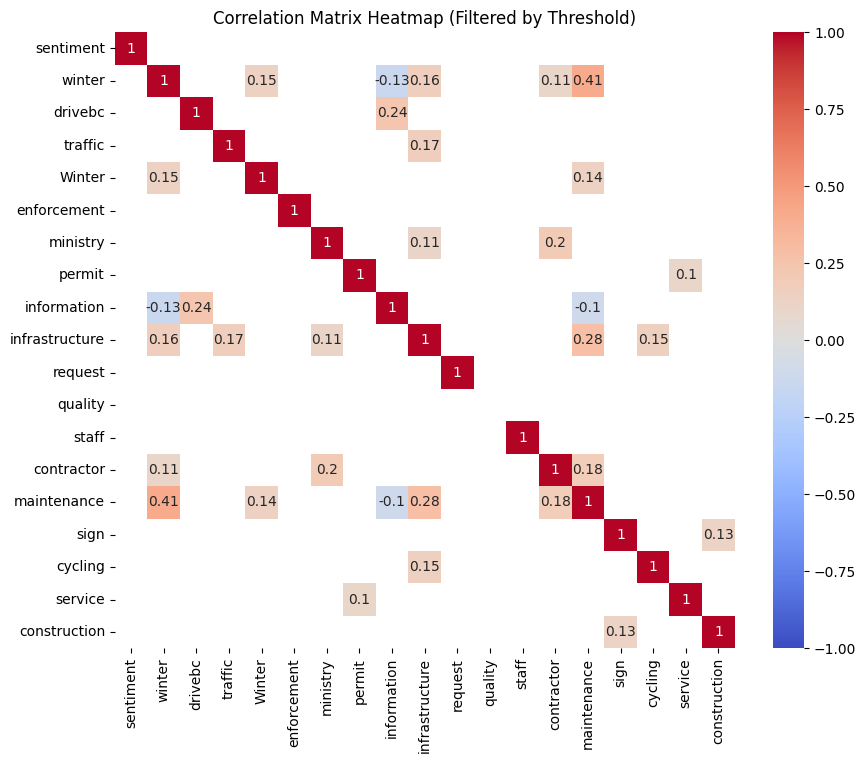

winter and maintenance: 0.41
infrastructure and maintenance: 0.28
drivebc and information: 0.24
ministry and contractor: 0.20
contractor and maintenance: 0.18
traffic and infrastructure: 0.17
winter and infrastructure: 0.16
infrastructure and cycling: 0.15
winter and Winter: 0.15
Winter and maintenance: 0.14
winter and information: -0.13
sign and construction: 0.13
ministry and infrastructure: 0.11
winter and contractor: 0.11
information and maintenance: -0.10
permit and service: 0.10


In [29]:
correlation_df = pd.read_csv(r"D:\Data Analysis\Qualitative Analysis\reports\thematic_analysis_report.csv")
threshold = 0.1

correlations = analyze_correlation(df, threshold)
for (col1, col2), score in correlations:
    print(f"{col1} and {col2}: {score:.2f}")